# Neural Network

In [ ]:
# Importem les llibreries bàsiques i específiques per la xarxa neuronal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm, trange

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Output, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### Load processed data

In [ ]:
pth = "C:/Users/34627/Documents/GitHub/Gorrapiedra-proyecto/data/formated data"

df_20 = pd.read_csv(os.path.join(pth, "data_2020.csv"), index_col=False, skipinitialspace=True, skip_blank_lines=True)
df_21 = pd.read_csv(os.path.join(pth, "data_2021.csv"), index_col=False, skipinitialspace=True, skip_blank_lines=True)
df_22 = pd.read_csv(os.path.join(pth, "data_2022.csv"), index_col=False, skipinitialspace=True, skip_blank_lines=True)
df_23 = pd.read_csv(os.path.join(pth, "data_2023.csv"), index_col=False, skipinitialspace=True, skip_blank_lines=True)
df = pd.concat([df_20, df_21, df_22, df_23], ignore_index = True)

if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)   # Eliminar columna Unnamed

# Visualitzar el df
df.head()

In [ ]:
# Separar les característiques (X) de la variable objectiu (y)
X = df.drop(['percentage_docks_available'], axis=1)
y = df['percentage_docks_available']

In [ ]:
# Dividim les dades en conjunts de training i testing
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

### Neural Network

In [ ]:
pip install tensorflow

In [ ]:
# Encoding
cat_cols = ['station_id']
x_train_encoded = pd.get_dummies(X_train, columns=cat_cols)
x_validation_encoded = pd.get_dummies(X_validation, columns=cat_cols)

In [ ]:
# Veiem si el training set y el validation set tenen diferent número de columnes després del encoding. Mirem quines son les columnes que falten al validation set.
missing_cols = set(x_train_encoded.columns) - set(x_validation_encoded.columns)
print("Missing columns in validation set:", missing_cols)

# Si hay columnas que faltan en el validation set, las borramos del training set
for col in missing_cols:
    x_train_encoded.drop(col, axis=1, inplace=True)

print("Training set shape after deleting columns:", x_train_encoded.shape)
print("Validation set shape:", x_validation_encoded.shape)

Missing columns in validation set: set()
Training set shape after deleting columns: (2292612, 518)
Validation set shape: (982548, 518)


In [ ]:
# Normalitzar les dades
scaler = StandardScaler()

x_train_encoded_scal = scaler.fit_transform(x_train_encoded)
x_validation_encoded_scal = scaler.fit_transform(x_validation_encoded) # A XVALIDATION SHA DE FER FIT_TRANSFORM TAMBÉ PERQUÈ SIGUIN INDEPENDENTS TRAINING I VALIDATION NO?

print("Training set shape:", x_train_encoded_scal.shape)
print("Validation set shape:", x_validation_encoded_scal.shape)

Training set shape: (2292612, 518)
Validation set shape: (982548, 518)


In [ ]:
# Construir el modelo neuronal
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

In [ ]:
#from tensorflow import keras
#from tensorflow.keras import layers

lr = 1e-3
Nhid1 = 20
Nhid2 = 20
Nhid3 = 19
Nhid4 = 19
activ = 'relu'
loss_f = 'mse'
optim = 'adam'
bs = 48
epochs = 10

# Define the neural network architecture
net = Sequential([
    Input(shape=(x_train_encoded_scal.shape[1],)), 
    Dense(Nhid1, activation='Sigmoid'),
    Dropout(0.2),
    Dense(Nhid2, activation=activ),
    Dropout(0.2),
    Dense(Nhid3, activation=activ),
    Dropout(0.2),
    Dense(Nhid4, activation=activ),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
net.compile(optimizer=optim, loss=loss_f)

# Train the model
history = net.fit(x_train_encoded_scal, y_train, epochs=epochs, batch_size=bs, validation_data=(x_validation_encoded_scal, y_validation))

Epoch 1/10
47763/47763 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - loss: 0.0329 - root_mean_squared_error: 0.1725 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1262
Epoch 2/10
47763/47763 ━━━━━━━━━━━━━━━━━━━━ 120s 2ms/step - loss: 0.0168 - root_mean_squared_error: 0.1294 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1198
Epoch 3/10
47763/47763 ━━━━━━━━━━━━━━━━━━━━ 125s 3ms/step - loss: 0.0165 - root_mean_squared_error: 0.1286 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1239
Epoch 4/10
47763/47763 ━━━━━━━━━━━━━━━━━━━━ 199s 4ms/step - loss: 0.0165 - root_mean_squared_error: 0.1284 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1226
Epoch 5/10
47763/47763 ━━━━━━━━━━━━━━━━━━━━ 184s 4ms/step - loss: 0.0163 - root_mean_squared_error: 0.1279 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1248
Epoch 6/10
47763/47763 ━━━━━━━━━━━━━━━━━━━━ 231s 5ms/step - loss: 0.0163 - root_mean_squared_error: 0.1278 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1236
Epoch 7/10
47763/

In [ ]:
# Evaluate the model
loss, accuracy = net.evaluate(x_validation_encoded_scal, y_validation, verbose=1)  

# Make predictions
y_pred = net.predict(x_validation_encoded_scal)

30705/30705 ━━━━━━━━━━━━━━━━━━━━ 11s 339us/step - loss: 0.0161 - root_mean_squared_error: 0.1267
30705/30705 ━━━━━━━━━━━━━━━━━━━━ 10s 317us/step
Test Loss: 0.0161
Adam, mse, 0.001, 20, 20, 19, 19, Bs 48, Epoch_10, Final loss_0.0161


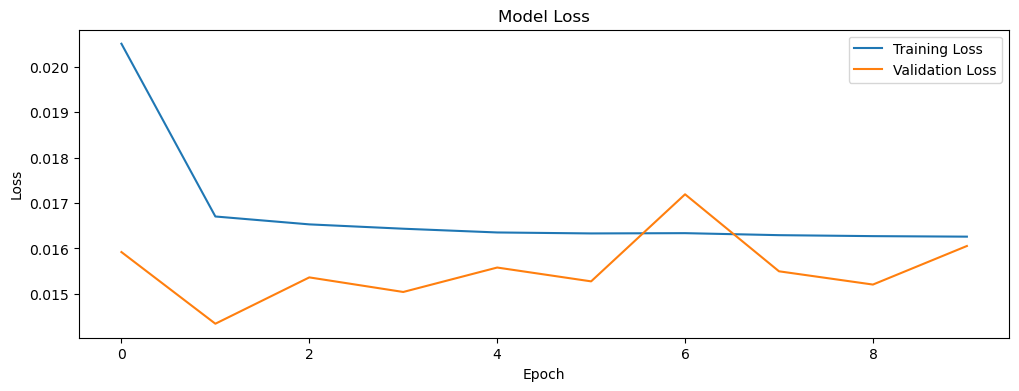

In [ ]:
print(f'Test Loss: {loss:.4f}')

# Plot loss

title = f"Adam, {loss_f}, {lr}, {Nhid1}, {Nhid2}, {Nhid3}, {Nhid4}, Bs {bs}, Epoch_{epochs}, Final loss_{loss:.4f}"

plt.figure(figsize=(12, 4))
plt.title(title)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
#plt.savefig(f'/Users/albam/Desktop/UNIVERSITAT/POSTGRAU/CAPSTONE_PROJECT/Gorrapiedra-proyecto/outputs/loss-ann/{title}.pdf')
print(title)
plt.show()

In [ ]:
# Feature importance NO PROVAT a ver si de repente sale algo
importances = net.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(x_train_encoded_scal.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})") 